In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import pathlib
from sklearn.decomposition import PCA


In [2]:
feature = 'pr_count'
feature_list = ['symbol','pr_count','issues_count','commit_add_sum','commit_del_sum','commit_count',
                'star_count','close','high','low','open','usd_market_cap','usd_volume']
coins = ['BTC', 'BCH', 'BCD', 'BTG', 'DASH', 'DCR', 'DOGE', 'ETN', 'LTC', 'PIVX', 'XLM', 'XMR', 
                'XRB', 'XRP', 'ZEC','ADA', 'ARK', 'BTS', 'DGB', 'DRGN', 'EOS', 'FCT', 'GNT', 'LSK', 
                'NEO', 'OMG', 'QTUM', 'REP', 'RHOC', 'SNT', 'STEEM', 'STRAT', 'WAVES','ZRX','ETH','SC','BCN',
               'XVG','ZCL']
labels = ['payment','utility','payment_utility','asset_utility','unknown']

In [3]:
dfs = []
hist_symbol = []
feat_cols = []
for path in pathlib.Path("github_data").iterdir():
    filename = path.name
    symbol = filename.split('.')[0]
    #name=('{}_'+feature).format(symbol)
    sdf = pd.read_csv(path,
                          usecols=[feature_list.index(feature)],
                          header=0,
                          #names=[('{}_'+feature).format(symbol)])
                          names=[symbol])
    #feat_cols.append(name)
    feat_cols.append(symbol)
    dfs.append(sdf)
    hist_symbol.append(symbol)
hist_symbol = set(hist_symbol)



In [4]:
feature_df = pd.concat(dfs, axis=1)
feature_df.describe()

,ADA,ARK,BCH,BCN,BTC,BTG,BTS,DASH,DCR,DGB,...,STRAT,WAVES,XLM,XMR,XRB,XRP,XVG,ZCL,ZEC,ZRX
count,135.000000,257.000000,205.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,...,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,181.000000
mean,5.251852,0.089494,0.170732,0.058366,4.953307,0.357977,0.638132,1.396887,1.038911,0.046693,...,1.003891,1.747082,0.638132,2.957198,0.797665,0.673152,0.614786,0.073930,0.649805,1.254144
std,3.201489,0.336234,0.437374,0.319451,2.884116,1.029005,1.021920,1.773853,1.681251,0.261005,...,1.350631,2.071534,0.966926,2.403228,1.585430,0.898229,2.240312,0.276666,1.035470,1.585191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,2.000000,1.000000,0.000000,...,2.000000,3.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
max,15.000000,3.000000,2.000000,4.000000,16.000000,11.000000,5.000000,17.000000,16.000000,3.000000,...,8.000000,12.000000,5.000000,14.000000,9.000000,4.000000,24.000000,2.000000,7.000000,8.000000


In [5]:
feature_df = feature_df.fillna(0)

## Perform PCA on _feature_df_  for both the first 2 principal components and 3 components

In [6]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(feature_df[feat_cols].values)

feature_df['pca-one'] = pca_result[:,0]
feature_df['pca-two'] = pca_result[:,1] 
feature_df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.14828246 0.12992813 0.10695693]


## t-SNE on 2 and 3 components

In [7]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(feature_df[feat_cols].values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 257 samples in 0.001s...
[t-SNE] Computed neighbors for 257 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 257 / 257
[t-SNE] Mean sigma: 4.398451
[t-SNE] KL divergence after 250 iterations with early exaggeration: 130.050064
[t-SNE] Error after 300 iterations: 3.250185
t-SNE done! Time elapsed: 2.9058921337127686 seconds


## Map symbols to coin function labels before plotting

In [8]:
feature_df.rename(columns={'ADA':'utility','BTC':'payment', 'BCH':'payment', 'BCD':'payment', 'BTG':'payment', 'DASH':'payment', 'DCR':'payment', 
    'DOGE':'payment', 'ETN':'payment', 'LTC':'payment', 'PIVX':'payment', 'XLM':'payment', 'XMR':'payment', 
    'XRB':'payment', 'XRP':'payment', 'ZEC':'payment','ARK':'utility', 'BTS':'utility', 
    'DGB':'utility', 'DRGN':'utility', 'EOS':'utility', 'FCT':'utility', 'GNT':'utility', 'LSK':'utility', 
    'NEO':'utility', 'OMG':'utility', 'QTUM':'utility', 'REP':'utility', 'RHOC':'utility', 'SNT':'utility', 
    'STEEM':'utility', 'STRAT':'utility', 'WAVES':'utility','ZRX':'utility','ETH':'payment_utility',
    'SC':'asset_utility','BCN':'unknown','XVG':'unknown', 'ZCL':'unknown'},
                 inplace=True)
#print(feature_df)

In [9]:
#print(feature_df.columns.values)
#for i in range(0,38):
    #print(feature_df.columns[i])

## Plot PCA for both the 1st 2 principal components and 3 components

In [10]:
labels = ['payment','utility','payment_utility','asset_utility','unknown']
# label-to-color dictionary
label_color_dict = {'utility':'red','payment':'green','payment_utility':'blue','asset_utility':'magenta','unknown':'yellow'}
# Color vector creation
cvec = [label_color_dict[label] for label in labels]

{'utility': 'red', 'payment': 'green', 'payment_utility': 'blue', 'asset_utility': 'magenta', 'unknown': 'yellow'}


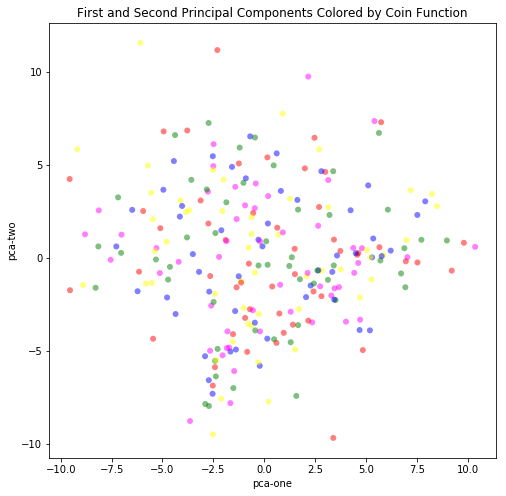

In [11]:
# Create the scatter plot
plt.figure(figsize=(8,8))
plt.scatter(pca_result[:,0], pca_result[:,1],
            c=cvec, edgecolor='', alpha=0.5)
plt.xlabel("pca-one")
plt.ylabel("pca-two")
plt.title("First and Second Principal Components Colored by Coin Function")
#plt.legend(loc='best')
print(label_color_dict)
   
plt.show()

3 Components

In [12]:
#from mpl_toolkits.mplot3d import Axes3D 
#from matplotlib import pyplot

#fig = pyplot.figure(figsize=(7,7))
#ax = Axes3D(fig)

#ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2],c=cvec, edgecolor='', alpha=0.5)
#ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2])
#ax.set_xlabel("pca-one")
#ax.set_ylabel("pca-two")
#ax.set_zlabel("pca-three")
#plt.title("First Three Principal Components Colored by Coin Function")

#pyplot.show()

Text(0.5,0.92,'First Three Principal Components Colored by Coin Function')

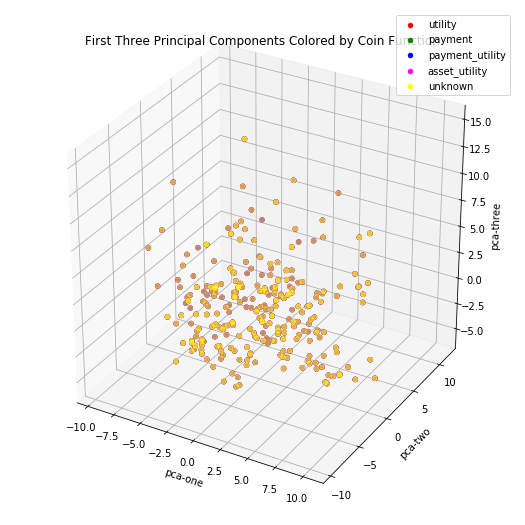

In [13]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import pyplot

fig = pyplot.figure(figsize=(7,7))
ax = Axes3D(fig)
for label, color in label_color_dict.items():
    ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2], 
            color=color, label=label)

ax.legend(loc='best')
ax.set_xlabel("pca-one")
ax.set_ylabel("pca-two")
ax.set_zlabel("pca-three")
plt.title("First Three Principal Components Colored by Coin Function")

## Plot t-SNE 

Visualise the two dimensions by creating a scatter plot and coloring each sample by its respective label

Text(0.5,1,'tSNE dimensions colored by coin function')

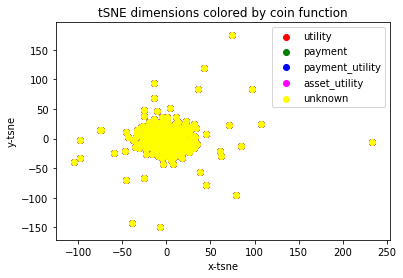

In [14]:
fig, ax = plt.subplots(1,1)
for label, color in label_color_dict.items():
    ax.scatter(tsne_results[:,0], tsne_results[:,1],  
            color=color, label=label)

ax.legend(loc='best')
plt.xlabel("x-tsne")
plt.ylabel("y-tsne")
plt.title("tSNE dimensions colored by coin function")

3 Components

Text(0.5,0.92,'tSNE dimensions colored by coin function')

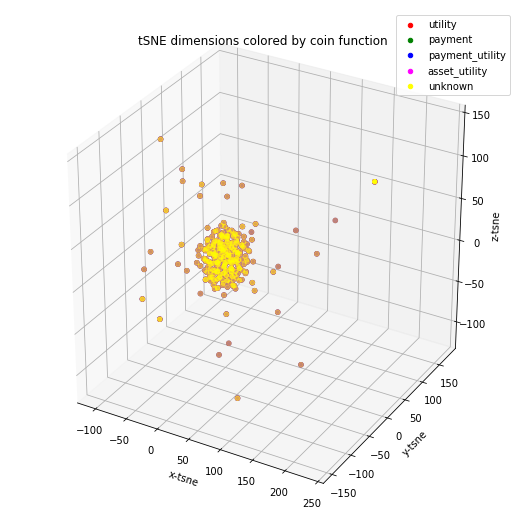

In [15]:
#fig, ax = plt.subplots(1,1)
fig = pyplot.figure(figsize=(7,7))
ax = Axes3D(fig)
for label, color in label_color_dict.items():
    ax.scatter(tsne_results[:,0], tsne_results[:,1], tsne_results[:,2], 
            color=color, label=label)

ax.legend(loc='best')
plt.xlabel("x-tsne")
plt.ylabel("y-tsne")
ax.set_zlabel("z-tsne")
plt.title("tSNE dimensions colored by coin function")